In [34]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
summer = pd.read_csv('summer.csv')
summer['Year'] = summer['Year'].astype(int)
summer = summer[summer['Year'].between(1960, 2013)]
gdps = pd.read_csv('USA GDP Growth 1961-2021.csv')
gdps['Year'] = gdps['Year'].astype(int)
gdps['GDP'] = gdps['GDP'].apply(lambda x: x.strip('$B'))
gdps['GDP'] = gdps['GDP'].apply(lambda x : x.replace(',','')).astype(float)
gdps = gdps[gdps['Year'].between(1960, 2008)]
gdps['GDP'] = gdps['GDP']/100

In [37]:
# IND
summerus = summer[summer['Country'] == 'USA']
summerusg = summerus[summerus['Medal'] == 'Gold']
summeruss = summerus[summerus['Medal'] == 'Silver']
summerusb = summerus[summerus['Medal'] == 'Bronze']

# number of gold medals of US every year
gold = summerusg.groupby('Year').agg('count').filter(['Medal'])
silver = summeruss.groupby('Year').agg('count').filter(['Medal'])
bronze = summerusb.groupby('Year').agg('count').filter(['Medal'])
e = summer.groupby('Year').agg('count').filter(['Sport'])
m= gold+silver+bronze


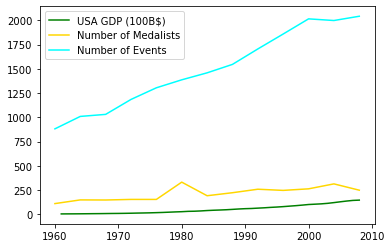

In [38]:
gd = plt.plot(gdps['Year'].tolist(), gdps['GDP'].tolist(), c = 'green', label = 'USA GDP (100B$)')
g = plt.plot(list(range(1960, 2012, 4)), m['Medal'].tolist(), c = 'gold', label = 'Number of Medalists')
plt.plot(list(range(1960, 2012, 4)), e['Sport'].tolist()[0:-1], c = 'cyan', label = 'Number of Events')
plt.legend();